In [10]:
!pip install pyshp geopandas descartes shapely

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


# Shapeファイルの読み込み
# 読み込むのはshpだけでも、dbfやshxなどのファイルも必要
data = gpd.read_file('A29-11_13.shp',encoding='SHIFT-JIS')


In [16]:
data

,A29_001,A29_002,A29_003,A29_004,A29_005,A29_006,A29_007,A29_008,A29_009,A29_010,geometry
0,13101,東京都,千代田区,9,商業地域,80,800,千代田区,2010,None,"POLYGON ((139.74860 35.67027, 139.74855 35.670..."
1,13101,東京都,千代田区,9,商業地域,80,800,千代田区,2010,None,"POLYGON ((139.75479 35.67133, 139.75617 35.670..."
2,13101,東京都,千代田区,9,商業地域,80,700,千代田区,2010,None,"POLYGON ((139.74809 35.67041, 139.74820 35.670..."
3,13101,東京都,千代田区,9,商業地域,80,1000,千代田区,2010,None,"POLYGON ((139.76131 35.67378, 139.76093 35.673..."
4,13101,東京都,千代田区,9,商業地域,80,500,千代田区,2010,None,"POLYGON ((139.75592 35.67670, 139.75525 35.675..."
...,...,...,...,...,...,...,...,...,...,...,...
11172,13106,東京都,台東区,5,第一種住居地域,60,300,台東区,2011,None,"POLYGON ((139.76838 35.71294, 139.76838 35.712..."
11173,13112,東京都,世田谷区,1,第一種低層住居専用地域,50,100,世田谷区,2011,None,"POLYGON ((139.60398 35.67998, 139.60446 35.679..."
11174,13115,東京都,杉並区,3,第一種中高層住居専用地域,60,200,杉並区,2010,None,"POLYGON ((139.60585 35.68083, 139.60630 35.680..."
11175,13229,東京都,西東京市,8,近隣商業地域,80,300,西東京市,2011,None,"POLYGON ((139.56776 35.75120, 139.56789 35.750..."


[(139.74859964, 35.67027362), (139.74855436, 35.67023477), (139.74819516, 35.67036835), (139.74808866, 35.67040978), (139.74809001, 35.67041001), (139.74869676, 35.67048093), (139.74906274, 35.67067172), (139.74893101, 35.67055901), (139.74886101, 35.67049901), (139.74884601, 35.670485), (139.74859964, 35.67027362)]
商業地域
[(139.74808866, 35.67040978), (139.74819516, 35.67036835), (139.74855436, 35.67023477), (139.74817001, 35.66990501), (139.74814302, 35.66988401), (139.74779901, 35.66961701), (139.74766402, 35.66960901), (139.74763801, 35.66961501), (139.74747601, 35.66965601), (139.74720902, 35.66990501), (139.74698602, 35.67005901), (139.74697301, 35.67026701), (139.74695901, 35.67050501), (139.74676801, 35.67050901), (139.74664401, 35.67046801), (139.74622801, 35.67051601), (139.74611501, 35.67053601), (139.74598201, 35.67055901), (139.74537301, 35.67066701), (139.74534301, 35.67067201), (139.74529801, 35.67099301), (139.74521401, 35.67100401), (139.74512001, 35.67102001), (139.7449

<Figure size 432x288 with 0 Axes>

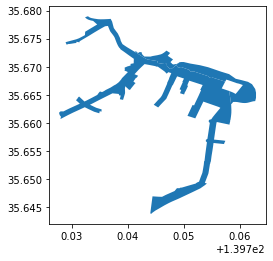

In [18]:
# 対象の領域の座標(googlemapsでプロットした座標など)
# -> 最初と最後は同じ値（でないと、閉じられないのでエラーになる）
# -> 実際には、ユーザが立てようとしている敷地より大きくなる（敷地の周りの用途地域の情報なども含むため）
# -> 特に指定はないはずなので、がっつりと100mぐらいの余裕を持って指定してもらってもいいかもしれない
coords = [(139.74859964, 35.67027362), (139.74855436, 35.67023477), (139.74819516, 35.67036835), (139.74859964, 35.67027362)]

# ポリゴンの生成
poly = Polygon(coords)

# 対象のポリゴンと交差するポリゴンを全部取得
# -> 対象の領域が含まれているポリゴンを全部取得
data["is_intersect"] = data["geometry"].apply(lambda x: x.intersects(poly2))
data = data.query("is_intersect == True")

# 対象の点座標と用途地域を取得
for d in data.iterrows():
    area_purpose = (d[1][4])
    x, y = d[1][10].exterior.coords.xy
    
    xy = [ xy for xy in zip(x, y) ] 
    
    # ここで表示している座標情報と用途地域を元にJSONを組み立てればいいはず
    print(xy)
    print(area_purpose)
    

# ついでに描画
fig = plt.figure()
data.plot()